## Capstone Project

***

## Project Description

Inu + Neko is a company you’ve seen a lot in this course. As a reminder, they are a pet supply and services company that just started an e-commerce business. You have been asked to help them analyze their data to help them make better decisions in the future. 

Inu + Neko had a lot of success with a marketing campaign and is seeing a lot of growth. The company wants to know how these new incoming customers differ from their past customers. Are there different items they should stock more of? Are there other things they should consider?

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|

## Summary

## Recommendation for Action

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("inu_neko_orderline_clean.csv")

In [3]:
df

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,total_sales
0,10300097,719638485153,1001019,35:21.4,2021,1,1,1,1,20,New York,72.99,Cat Cave,bedding,cat,72.99
1,10300093,73201504044,1001015,33:37.5,2021,1,1,1,1,34,New York,18.95,Purrfect Puree,treat,cat,18.95
2,10300093,719638485153,1001015,33:37.5,2021,1,1,1,1,34,New York,72.99,Cat Cave,bedding,cat,72.99
3,10300093,441530839394,1001015,33:37.5,2021,1,1,1,2,34,New York,28.45,Ball and String,toy,cat,56.90
4,10300093,733426809698,1001015,33:37.5,2021,1,1,1,1,34,New York,18.95,Yum Fish-Dish,food,cat,18.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38218,10327860,287663658863,1022098,37:12.8,2021,6,30,30,1,25,New York,9.95,All Veggie Yummies,treat,dog,9.95
38219,10327960,140160459467,1022157,45:09.9,2021,6,30,30,2,31,Pennsylvania,48.95,Snoozer Essentails,bedding,dog,97.90
38220,10328009,425361189561,1022189,57:44.3,2021,6,30,30,2,53,New Jersey,15.99,Snack-em Fish,treat,cat,31.98
38221,10328089,733426809698,1022236,59:29.8,2021,6,30,30,1,23,Tennessee,18.95,Yum Fish-Dish,food,cat,18.95


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38223 entries, 0 to 38222
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trans_id          38223 non-null  int64  
 1   prod_upc          38223 non-null  int64  
 2   cust_id           38223 non-null  int64  
 3   trans_timestamp   38223 non-null  object 
 4   trans_year        38223 non-null  int64  
 5   trans_month       38223 non-null  int64  
 6   trans_day         38223 non-null  int64  
 7   trans_hour        38223 non-null  int64  
 8   trans_quantity    38223 non-null  int64  
 9   cust_age          38223 non-null  int64  
 10  cust_state        38223 non-null  object 
 11  prod_price        38223 non-null  float64
 12  prod_title        38223 non-null  object 
 13  prod_category     38223 non-null  object 
 14  prod_animal_type  38223 non-null  object 
 15  total_sales       38223 non-null  float64
dtypes: float64(2), int64(9), object(5)
memor

In [5]:
df.describe(include='all')

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,total_sales
count,38223.00,38223.00,38223.00,38223,38223.00,38223.00,38223.00,38223.00,38223.00,38223.00,38223,38223.00,38223,38223,38223,38223.00
unique,NaN,NaN,NaN,19316,NaN,NaN,NaN,NaN,NaN,NaN,51,NaN,21,4,2,NaN
top,NaN,NaN,NaN,03:54.0,NaN,NaN,NaN,NaN,NaN,NaN,New York,NaN,Reddy Beddy,treat,cat,NaN
freq,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,10486,NaN,4734,11246,21944,NaN
mean,10314072.68,500428851627.90,1010657.01,NaN,2021.00,4.61,16.62,16.62,1.37,30.06,NaN,30.54,NaN,NaN,NaN,42.11
std,8076.08,258627113053.05,6117.27,NaN,0.00,1.39,8.72,8.72,0.71,6.96,NaN,18.73,NaN,NaN,NaN,36.61
min,10300091.00,73201504044.00,1001012.00,NaN,2021.00,1.00,1.00,1.00,1.00,18.00,NaN,9.95,NaN,NaN,NaN,9.95
25%,10307072.50,344538897332.00,1005253.50,NaN,2021.00,4.00,9.00,9.00,1.00,25.00,NaN,18.95,NaN,NaN,NaN,18.95
50%,10314074.00,469757173540.00,1010222.00,NaN,2021.00,5.00,17.00,17.00,1.00,29.00,NaN,21.95,NaN,NaN,NaN,32.91
75%,10321058.50,719638485153.00,1015805.50,NaN,2021.00,6.00,24.00,24.00,2.00,34.00,NaN,45.99,NaN,NaN,NaN,54.95


In [6]:
df.columns

Index(['trans_id', 'prod_upc', 'cust_id', 'trans_timestamp', 'trans_year', 'trans_month', 'trans_day', 'trans_hour', 'trans_quantity', 'cust_age', 'cust_state', 'prod_price', 'prod_title', 'prod_category', 'prod_animal_type', 'total_sales'], dtype='object')

### Type Change

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38223 entries, 0 to 38222
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trans_id          38223 non-null  int64  
 1   prod_upc          38223 non-null  int64  
 2   cust_id           38223 non-null  int64  
 3   trans_timestamp   38223 non-null  object 
 4   trans_year        38223 non-null  int64  
 5   trans_month       38223 non-null  int64  
 6   trans_day         38223 non-null  int64  
 7   trans_hour        38223 non-null  int64  
 8   trans_quantity    38223 non-null  int64  
 9   cust_age          38223 non-null  int64  
 10  cust_state        38223 non-null  object 
 11  prod_price        38223 non-null  float64
 12  prod_title        38223 non-null  object 
 13  prod_category     38223 non-null  object 
 14  prod_animal_type  38223 non-null  object 
 15  total_sales       38223 non-null  float64
dtypes: float64(2), int64(9), object(5)
memor

In [8]:
df["trans_id"] = df["trans_id"].astype('category')

In [9]:
df["prod_upc"] = df["prod_upc"].astype('category')

In [10]:
df["cust_id"] = df["cust_id"].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38223 entries, 0 to 38222
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   trans_id          38223 non-null  category
 1   prod_upc          38223 non-null  category
 2   cust_id           38223 non-null  category
 3   trans_timestamp   38223 non-null  object  
 4   trans_year        38223 non-null  int64   
 5   trans_month       38223 non-null  int64   
 6   trans_day         38223 non-null  int64   
 7   trans_hour        38223 non-null  int64   
 8   trans_quantity    38223 non-null  int64   
 9   cust_age          38223 non-null  int64   
 10  cust_state        38223 non-null  object  
 11  prod_price        38223 non-null  float64 
 12  prod_title        38223 non-null  object  
 13  prod_category     38223 non-null  object  
 14  prod_animal_type  38223 non-null  object  
 15  total_sales       38223 non-null  float64 
dtypes: category(3), float6

In [14]:
df.describe(include='all')

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,total_sales
count,38223.00,38223.00,38223.00,38223,38223.00,38223.00,38223.00,38223.00,38223.00,38223.00,38223,38223.00,38223,38223,38223,38223.00
unique,28022.00,23.00,21241.00,19316,NaN,NaN,NaN,NaN,NaN,NaN,51,NaN,21,4,2,NaN
top,10322343.00,733426809698.00,1005241.00,03:54.0,NaN,NaN,NaN,NaN,NaN,NaN,New York,NaN,Reddy Beddy,treat,cat,NaN
freq,7.00,3086.00,12.00,11,NaN,NaN,NaN,NaN,NaN,NaN,10486,NaN,4734,11246,21944,NaN
mean,NaN,NaN,NaN,NaN,2021.00,4.61,16.62,16.62,1.37,30.06,NaN,30.54,NaN,NaN,NaN,42.11
std,NaN,NaN,NaN,NaN,0.00,1.39,8.72,8.72,0.71,6.96,NaN,18.73,NaN,NaN,NaN,36.61
min,NaN,NaN,NaN,NaN,2021.00,1.00,1.00,1.00,1.00,18.00,NaN,9.95,NaN,NaN,NaN,9.95
25%,NaN,NaN,NaN,NaN,2021.00,4.00,9.00,9.00,1.00,25.00,NaN,18.95,NaN,NaN,NaN,18.95
50%,NaN,NaN,NaN,NaN,2021.00,5.00,17.00,17.00,1.00,29.00,NaN,21.95,NaN,NaN,NaN,32.91
75%,NaN,NaN,NaN,NaN,2021.00,6.00,24.00,24.00,2.00,34.00,NaN,45.99,NaN,NaN,NaN,54.95


### Groupby Function

In [19]:
df.groupby(["trans_id"])["total_sales"].sum().head()

trans_id
10300091    24.95
10300092    35.99
10300093   167.79
10300094    10.97
10300095    18.95
Name: total_sales, dtype: float64

In [22]:
d1 = pd.DataFrame(df.groupby(["trans_id"])["total_sales"].sum())

In [24]:
d1.sort_values(by="total_sales")

,total_sales
trans_id,
10303291,9.95
10315621,9.95
10325437,9.95
10318145,9.95
10305120,9.95
...,...
10323074,532.88
10314572,549.69
10316275,553.90


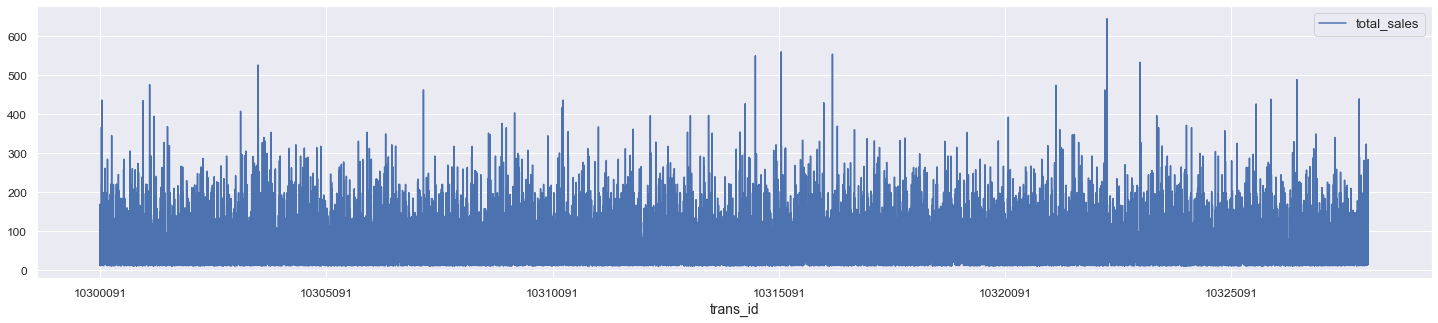

In [32]:
d1.plot(figsize=(25,5))
plt.show()

In [20]:
df.groupby(["prod_upc"])["total_sales"].sum().head()

prod_upc
73201504044     46484.35
100469015054    58782.90
140160459467   100739.10
242313721729   209848.20
287663658863    22845.20
Name: total_sales, dtype: float64

In [25]:
d2 = pd.DataFrame(df.groupby(["prod_upc"])["total_sales"].sum())

In [26]:
d2.sort_values(by="total_sales")

,total_sales
prod_upc,
483326155497,13561.66
287663658863,22845.20
845773115334,24369.24
425361189561,25344.15
621046126170,26484.48
374613020864,28291.63
904582148679,31257.70
575410882303,46402.30
73201504044,46484.35


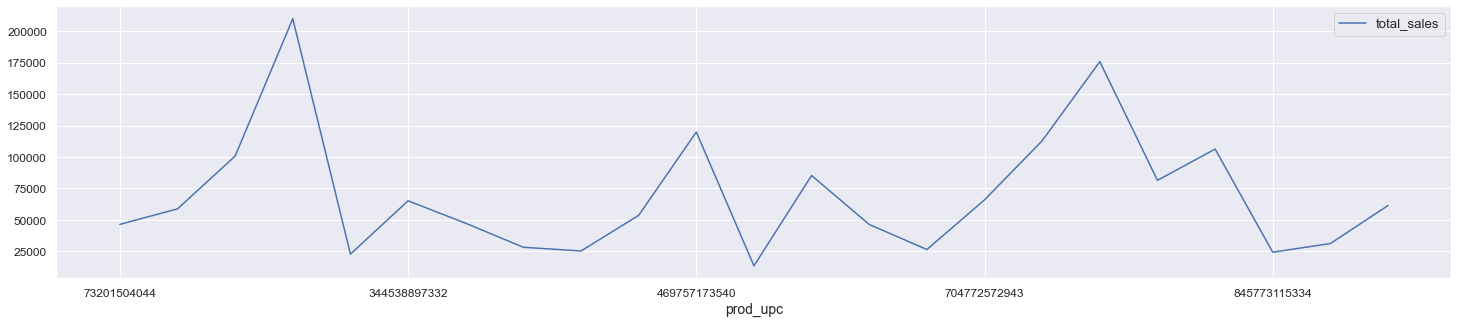

In [33]:
d2.plot(figsize=(25,5))
plt.show()

In [21]:
df.groupby(["cust_id"])["total_sales"].sum().head()

cust_id
1001012    72.80
1001013    60.99
1001014    71.95
1001015   167.79
1001016    70.94
Name: total_sales, dtype: float64

In [27]:
d3 = pd.DataFrame(df.groupby(["cust_id"])["total_sales"].sum())

In [28]:
d3.sort_values(by="total_sales")

,total_sales
cust_id,
1012206,9.95
1018773,9.95
1015854,9.95
1018781,9.95
1018784,9.95
...,...
1007595,611.65
1007511,638.53
1018521,644.86


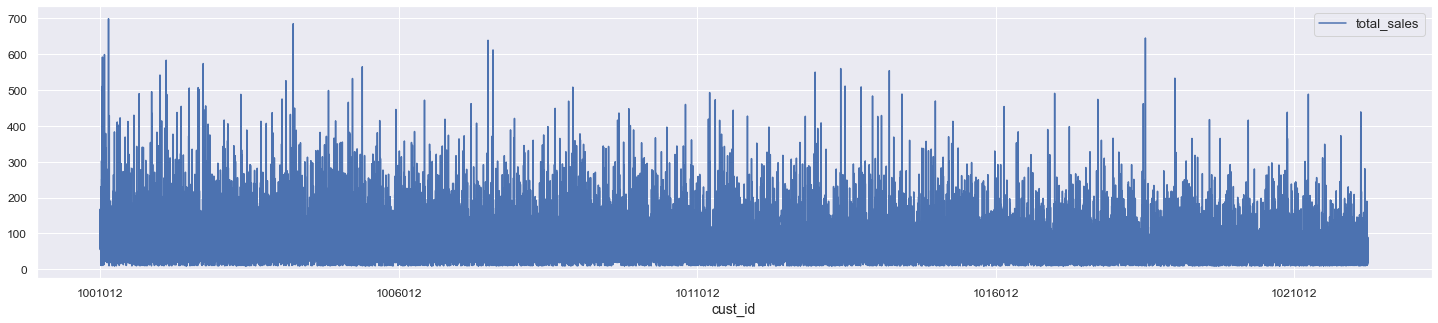

In [34]:
d3.plot(figsize=(25,5))
plt.show()

In [37]:
df.groupby(["trans_month"])["total_sales"].sum()

trans_month
1    51739.74
2    98762.99
3   198858.15
4   291358.04
5   419947.21
6   548822.73
Name: total_sales, dtype: float64

In [45]:
d4 = pd.DataFrame(df.groupby(["trans_month"])["total_sales"].sum())

In [46]:
d4.sort_values(by="total_sales")

,total_sales
trans_month,
1,51739.74
2,98762.99
3,198858.15
4,291358.04
5,419947.21
6,548822.73


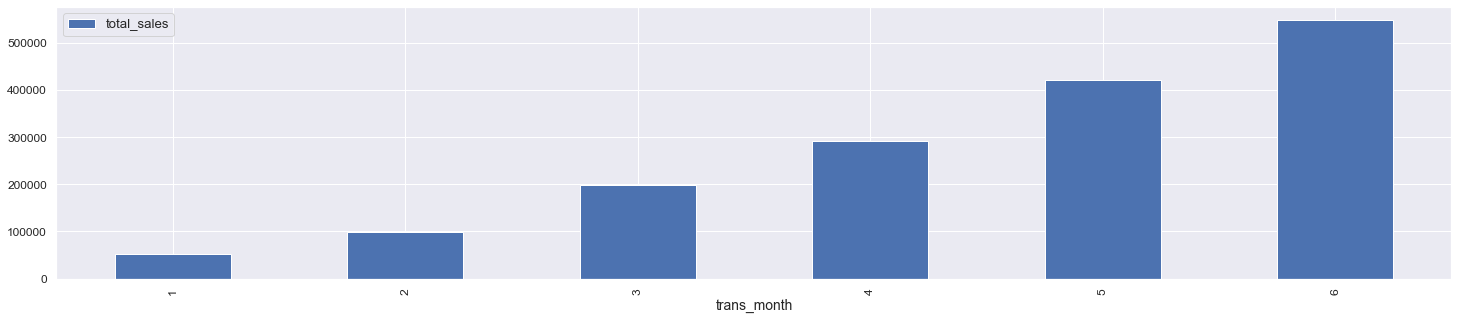

In [56]:
d4.plot(figsize=(25,5), kind='bar')
plt.show()

In [39]:
df.groupby(["trans_day"])["total_sales"].sum().head()

trans_day
1   40491.06
2   46046.35
3   45560.36
4   43896.20
5   47416.98
Name: total_sales, dtype: float64

In [48]:
d5 = pd.DataFrame(df.groupby(["trans_day"])["total_sales"].sum())

In [57]:
d5.sort_values(by="total_sales").head()

,total_sales
trans_day,
31,27025.04
1,40491.06
4,43896.20
6,45266.21
3,45560.36


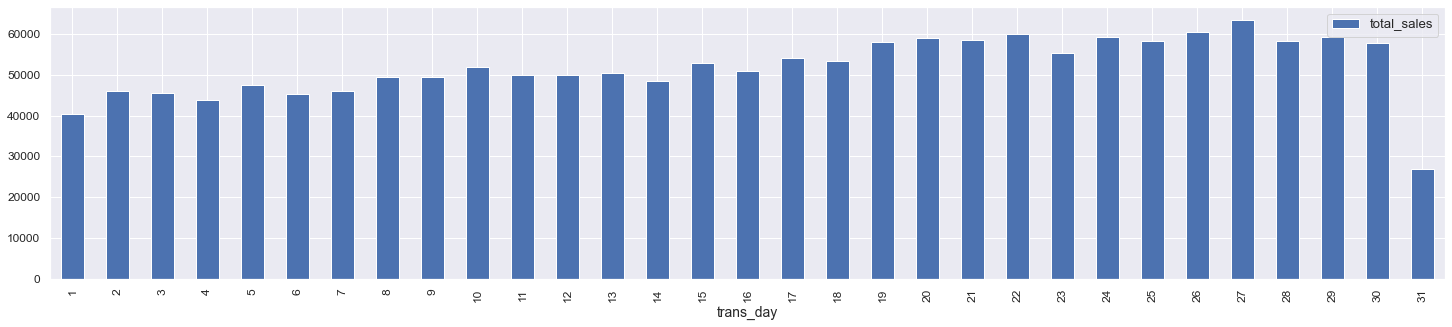

In [55]:
d5.plot(figsize=(25,5), kind='bar')
plt.show()

In [41]:
df.groupby(["cust_state"])["total_sales"].sum().head()

cust_state
Alabama      11678.81
Alaska        1046.99
Arizona      18864.32
Arkansas      6722.01
California   87512.89
Name: total_sales, dtype: float64

In [51]:
d6 = pd.DataFrame(df.groupby(["cust_state"])["total_sales"].sum())

In [60]:
d6.sort_values(by="total_sales").head()

,total_sales
cust_state,
Alaska,1046.99
Wyoming,1256.50
South Dakota,1362.68
North Dakota,1466.88
Vermont,1645.95


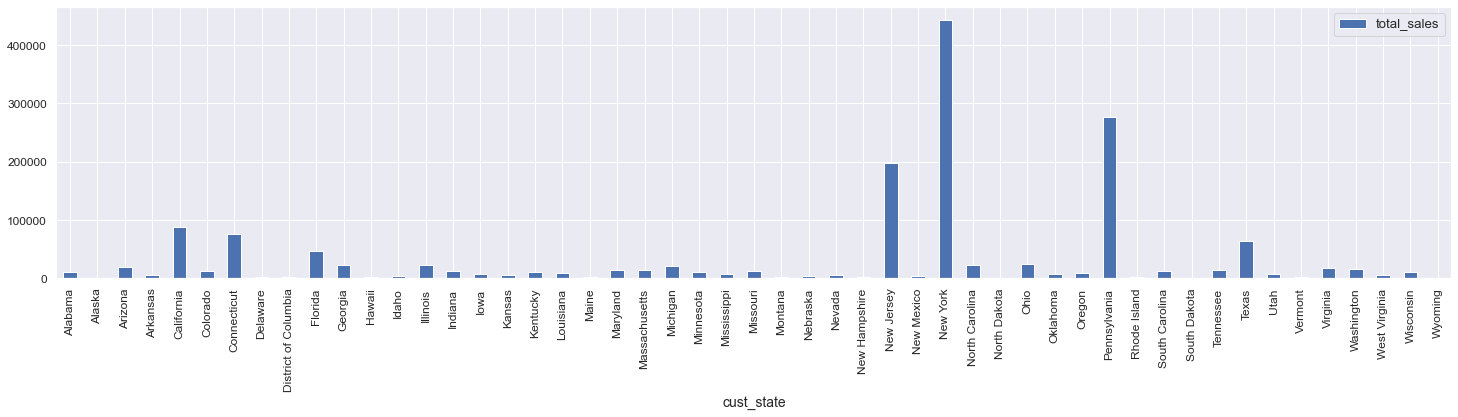

In [54]:
d6.plot(figsize=(25,5), kind='bar')
plt.show()

In [42]:
df.groupby(["prod_title"])["total_sales"].sum().head()

prod_title
All Veggie Yummies    22845.20
Ball and String       53628.25
Cat Cave             175759.92
Chewie Dental         28291.63
Chomp-a Plush         46402.30
Name: total_sales, dtype: float64

In [61]:
d7 = pd.DataFrame(df.groupby(["prod_title"])["total_sales"].sum())

In [62]:
d7.sort_values(by="total_sales")

,total_sales
prod_title,
The New Bone,13561.66
All Veggie Yummies,22845.20
Purr Mix,24369.24
Snack-em Fish,25344.15
Tug-a-Back,26484.48
Chewie Dental,28291.63
Whole Chemistry Recipe,31257.70
Chomp-a Plush,46402.30
Purrfect Puree,46484.35


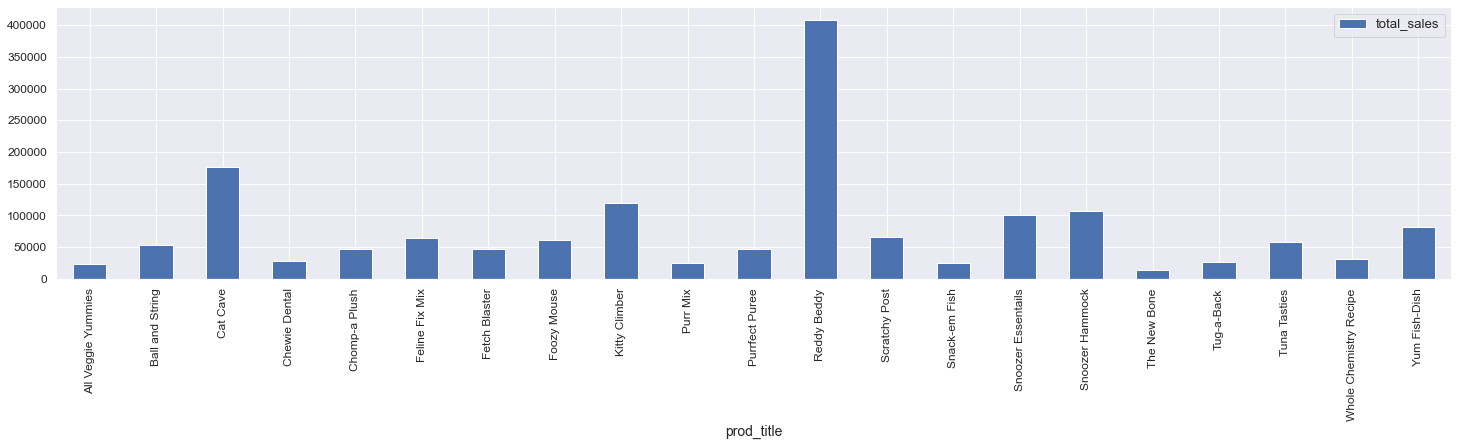

In [63]:
d7.plot(figsize=(25,5), kind='bar')
plt.show()

In [43]:
df.groupby(["prod_category"])["total_sales"].sum().head()

prod_category
bedding   790805.00
food      150635.70
toy       421092.55
treat     246955.61
Name: total_sales, dtype: float64

In [64]:
d8 = pd.DataFrame(df.groupby(["prod_category"])["total_sales"].sum())

In [65]:
d8.sort_values(by="total_sales")

,total_sales
prod_category,
food,150635.70
treat,246955.61
toy,421092.55
bedding,790805.00


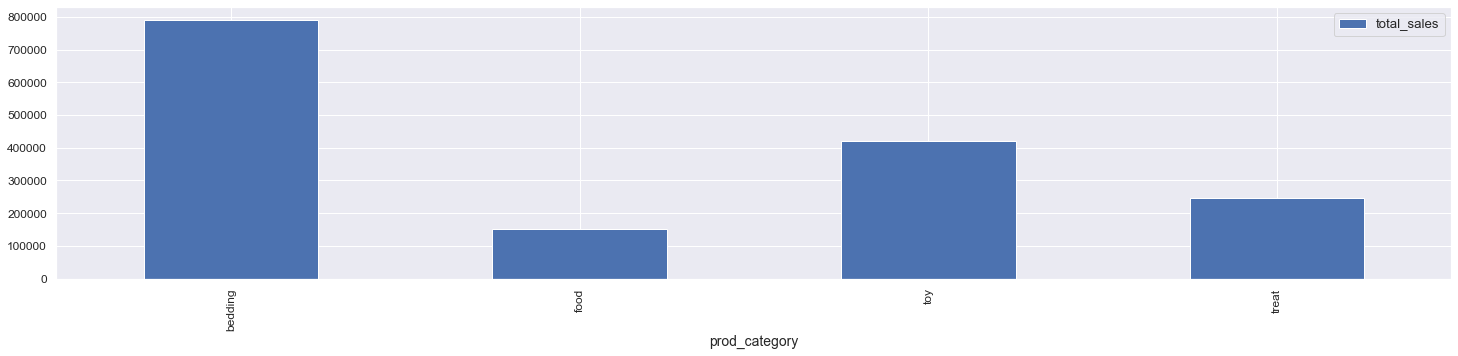

In [66]:
d8.plot(figsize=(25,5), kind="bar")
plt.show()

In [67]:
df.groupby(["prod_animal_type"])["total_sales"].sum().head()

prod_animal_type
cat   884528.60
dog   724960.26
Name: total_sales, dtype: float64

In [68]:
d9 = pd.DataFrame(df.groupby(["prod_animal_type"])["total_sales"].sum())

In [69]:
d9.sort_values(by="total_sales")

,total_sales
prod_animal_type,
dog,724960.26
cat,884528.60


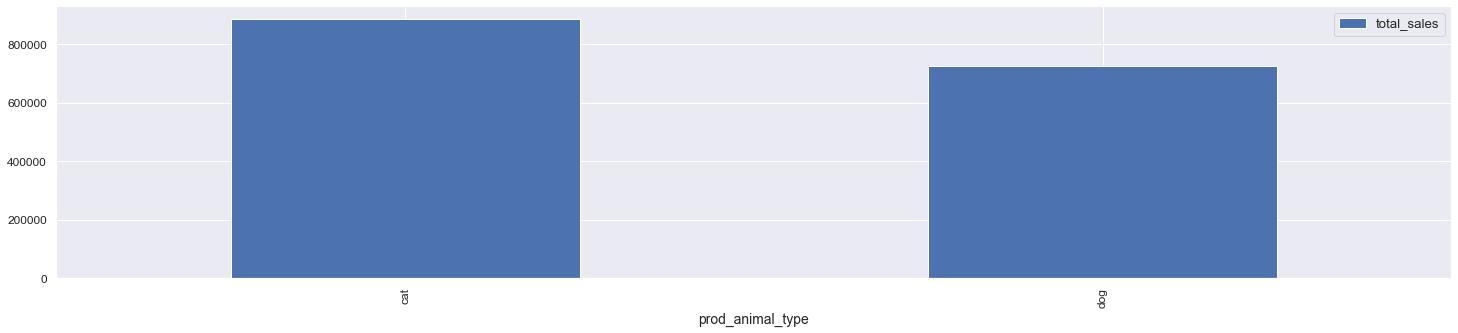

In [70]:
d9.plot(figsize=(25,5), kind='bar')
plt.show()

## Data Visualization

### Univariate Data Exploration

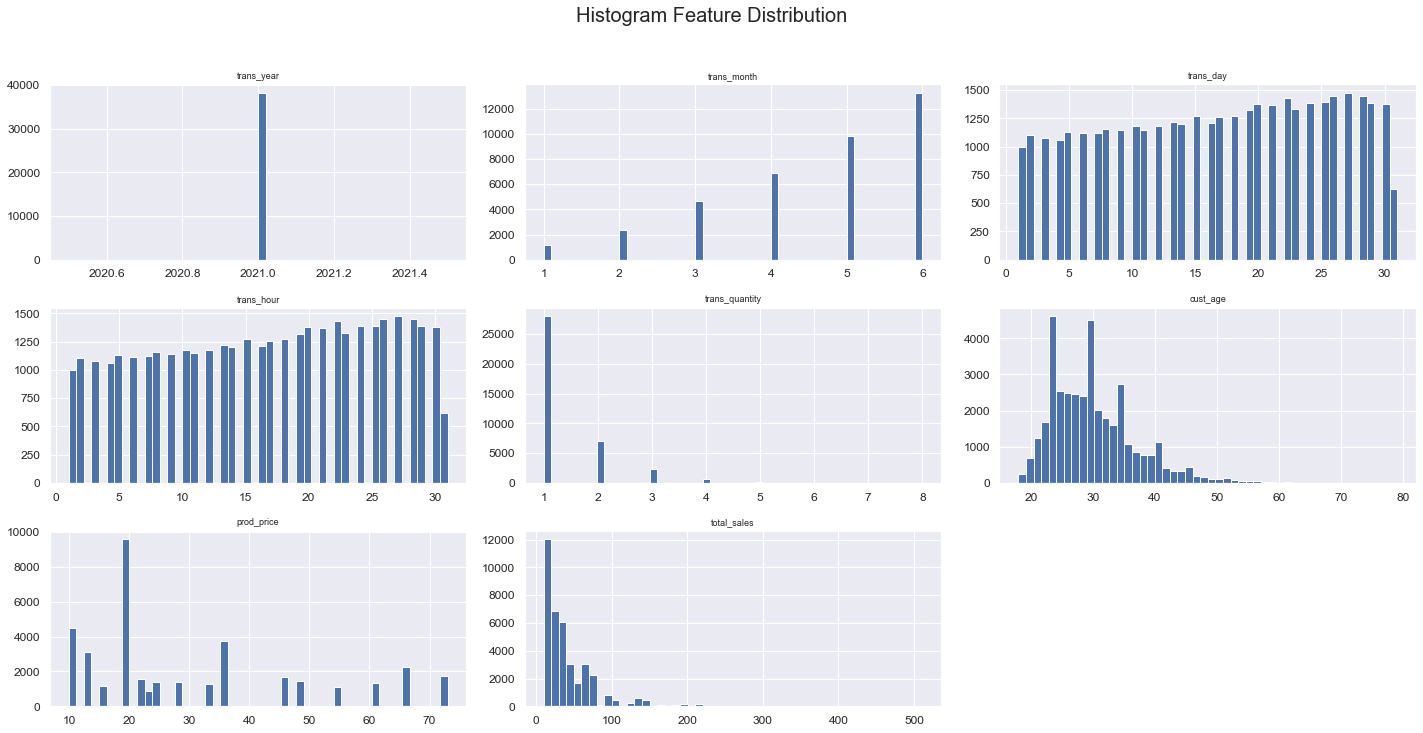

In [71]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

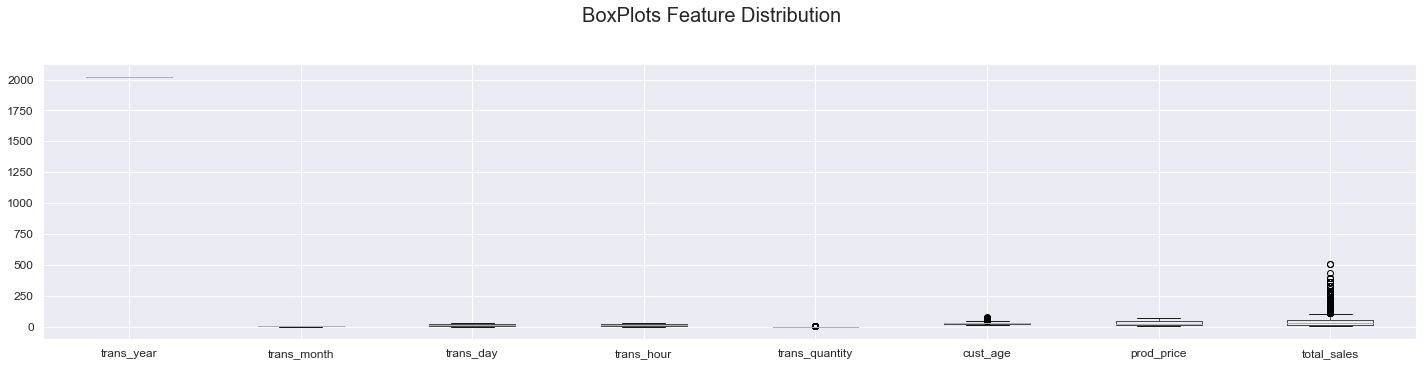

In [73]:
df.boxplot(figsize=(20,5))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(1,2, sharex=False, figsize=(16,5))
fig.suptitle('Main Title')



sns.countplot(x="education", data=df, hue=df.income, ax=ax[0])
ax[0].set_title('Title of the first chart')
ax[0].tick_params('x', labelrotation=45)

sns.countplot(x="sex", data=df, hue=df.income, ax=ax[1])
ax[1].set_title('Title of the second chart')

plt.show()

In [ ]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, figsize=(20,20))
fig.suptitle('Main Title', y=0.5)

sns.countplot(x="Satisfaction rating", data=df, ax=ax1)
ax1.set_title('Title of the first chart', size=20)
#ax1.tick_params('x', labelrotation=45)


sns.countplot(x="Topic", data=df, ax=ax2)
ax2.set_title('Title of the second chart', size=20)
#ax2.tick_params('x', labelrotation=45)

sns.countplot(x="Answered (Y/N)", data=df, ax=ax3)
ax3.set_title('Title of the third chart', size=20)
#ax3.tick_params('x', labelrotation=45)


sns.countplot(x="Resolved", data=df, ax=ax4)
ax4.set_title('Title of the fourth chart', size=20)
#ax4.tick_params('x', labelrotation=45)


plt.show()

In [ ]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("", size=20)
sns.countplot()

plt.subplot(7,2,2)
plt.title("", size=20)
sns.countplot()

plt.subplot(7,2,3)
plt.title("", size=20)
sns.countplot()

plt.subplot(7,2,4)
plt.title("", size=20)
sns.countplot()

plt.subplot(7,2,5)
plt.title("", size=20)
sns.barplot()

plt.subplot(7,2,6)
plt.title("", size=20)
sns.barplot()

plt.subplot(7,2,7)
plt.title("", size=20)
sns.barplot()

plt.subplot(7,2,8)
plt.title("", size=20)
sns.barplot()

plt.subplot(7,2,9)
plt.title("", size=20)
sns.scatterplot()

plt.subplot(7,2,10)
plt.title("", size=20)
sns.scatterplot()

plt.subplot(7,2,11)
plt.title("", size=20)
sns.scatterplot()

plt.subplot(7,2,12)
plt.title("", size=20)
sns.scatterplot()

plt.subplot(7,2,13)
plt.title("", size=20)
sns.relplot()

plt.subplot(7,2,14)
plt.title("", size=20)
sns.relplot()

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20,20))


g = sns.catplot(x='gender', hue = 'tenure', row = 'division',
            kind='count', data=ratings_df,
            height = 3, aspect = 1)

g.set_xlabels("")
g.set_ylabels("")
#g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)


g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)

plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)

plt.show()

In [ ]:
plt.figure(figsize=(20,20))

sns.catplot(x="calories", y="restaurant",

                hue="is_salad", ci=None,

                data=df_calories, color=None, linewidth=3, showfliers = False,

                orient="h", height=20, aspect=1, palette=None,

                kind="box", dodge=True)

plt.xlabel("", size=20)
plt.ylabel("", size=20)
plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))

sns.relplot(x="age", y="eval", hue="gender",
            row="tenure",
            data=ratings_df, height = 3, aspect = 2)

plt.xlabel("", size=20)
plt.ylabel("", size=20)
plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

### Time-Series Analysis

In [ ]:
timeseries = df[['date','extraction','month', 'day']]

In [ ]:
timeseries

In [ ]:
timeseries.info()

In [ ]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.date,y=df.amount,data=df, estimator=None)
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

In [ ]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.month,y=df.amount,data=df, estimator=None)
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

In [ ]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.month,y=df.amount,data=df, estimator=None)
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

### Pairplots

In [ ]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df.sample(500))
plt.show()

### Bivariate Data Exploration

In [ ]:
sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='kde')

sns.jointplot(x='', y='',data=df, kind='kde')

sns.jointplot(x='', y='',data=df, kind='hex')

sns.jointplot(x='', y='',data=df, kind='hex')

sns.jointplot(x='', y='',data=df, kind='reg',scatter_kws={'color':'k'},line_kws={'color':'red'})

sns.jointplot(x='', y='',data=df, kind='reg',scatter_kws={'color':'k'},line_kws={'color':'red'})

sns.lmplot(x='num_items', y='total_value', data=df, scatter_kws={'s': 1, 'alpha': 0.1}, height=5, aspect=1,
           line_kws={'lw': 2, 'color': 'red'})

sns.lmplot(x='num_items', y='total_value', data=df, scatter_kws={'s': 1, 'alpha': 0.1}, height=5, aspect=1,
           line_kws={'lw': 2, 'color': 'red'})

plt.tight_layout()
plt.show()

### Regression plot

In [ ]:
line_color = {'color': 'red'}
fig , ax = plt.subplots(2,2, figsize=(20,20))

#Feature

ax1 = sns.regplot(x=X_test.bmi, y=lr_pred, line_kws=line_color, ax=ax[0,0])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Plot 1", size=15)

#Feature

ax2 = sns.regplot(x=X_test.s5, y=lr_pred, line_kws=line_color, ax=ax[0,1])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Plot 2", size=15)

#Feature

ax3 = sns.regplot(x=X_test.bp, y=lr_pred, line_kws=line_color, ax=ax[1,0])
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("Plot 3", size=15)

#Feature

ax4 = sns.regplot(x=X_test.s4, y=lr_pred, line_kws=line_color, ax=ax[1,1])
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax1.set_title("Plot 4", size=15)

plt.show()

### FacetGrid

In [ ]:
g = sns.FacetGrid(data=df, col="column_name", height=3, aspect=1)
g.map(plt.scatter, "numeric", "numeric")
g.add_legend()
plt.show()

### Geospatial Analysis

In [ ]:
mapping = usa_stores[['City','Latitude','Longtitude','Sentiment','Revenue']]
mapping

In [ ]:
m = folium.Map(location=[37.090240,-95.712891], zoom_start=5)
m

In [ ]:
map_df = pd.DataFrame(mapping.groupby(["City","Latitude","Longtitude"]).mean())
map_df

In [ ]:
folium.Marker(location=[33.76,-84.42], popup="Atlanta", tooltip="Sentiment=83.69, Revenue=292.57").add_to(m)
folium.Marker(location=[36.23,-115.27], popup="Las Vegas", tooltip="Sentiment=83.72, Revenue=187.40").add_to(m)
folium.Marker(location=[34.11,-118.41], popup="Los Angeles", tooltip="Sentiment=83.75, Revenue=255.95").add_to(m)
folium.Marker(location=[40.69,-73.92], popup="New York", tooltip="Sentiment=83.71, Revenue=328.38").add_to(m)
folium.Marker(location=[32.83,-117.12], popup="San Diego", tooltip="Sentiment=83.70, Revenue=272.93").add_to(m)

m

In [ ]:
m.save("filename.html")

In [ ]:
state_geo = f"malaysia.geojson"

In [ ]:
map2 = folium.Map(location=[4.210484,108.975766], zoom_start=6)

And now to create a `Choropleth` map, we will use the *choropleth* method with the following main parameters:

1.  `geo_data`, which is the GeoJSON file.
2.  `data`, which is the dataframe containing the data.
3.  `columns`, which represents the columns in the dataframe that will be used to create the `Choropleth` map.
4.  `key_on`, which is the key or variable in the GeoJSON file that contains the name of the variable of interest. To determine that, you will need to open the GeoJSON file using any text editor and note the name of the key or variable that contains the name of the countries, since the countries are our variable of interest. In this case, **name** is the key in the GeoJSON file that contains the name of the countries. Note that this key is case_sensitive, so you need to pass exactly as it exists in the GeoJSON file.

In [ ]:
folium.Choropleth(geo_data=state_geo, name="choropleth").add_to(map2)

### Correlation

In [ ]:
df.corr()

In [ ]:
df.corr()["target"].sort_values()

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

## Hypothesis Testing

The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?” The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc). The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. Then compute the p-value, which is the probability of the null hypothesis being true, and finally interpret the result of the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.

### T-Test

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance


State the hypothesis

-   $H_0: µ\_1 = µ\_2$ ("there is no difference in evaluation scores between male and females")
-   $H_1: µ\_1 ≠ µ\_2$ ("there is a difference in evaluation scores between male and females")


### Levene's Test

In [ ]:
scipy.stats.levene(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], center='mean')

## T-Test

### One Sample T-Test

In [ ]:
t, p = scipy.stats.ttest_1samp(a=df.dose, popmean=1.166667)

In [ ]:
print("T-test value is: ", t)
print("p-value value is: ", p)

### Two Samples T-Test

In [ ]:
t, p = scipy.stats.ttest_ind(a=df.len,b=df.dose, equal_var = True/False)

In [ ]:
print("T-test value is: ",t)
print("p-value value is: ",p)

### ANOVA

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable - using the example from the video, we will create a new column for this newly assigned group our categories will be teachers that are:

-   40 years and younger
-   between 40 and 57 years
-   57 years and older


State the hypothesis

-   $H_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ


### One Way ANOVA

In [ ]:
mod = ols('len~supp', data=df).fit()

In [ ]:
aov_table = sm.stats.anova_lm(mod,typ=2)

In [ ]:
aov_table

In [ ]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

### Two-way ANOVA

In [ ]:
mod1 = ols('len~supp+dose', data=df).fit()

In [ ]:
aov1 = sm.stats.anova_lm(mod1,typ=2)

In [ ]:
aov1

### Chi-square

State the hypothesis:

-   $H_0:$ The proportion of teachers who are tenured is independent of gender
-   $H_1:$ The proportion of teachers who are tenured is associated with gender

In [ ]:
#Create a Cross-tab table

cont_table  = pd.crosstab(ratings_df['tenure'], ratings_df['gender'])
cont_table

In [ ]:
scipy.stats.chi2_contingency(cont_table, correction = True)

In [ ]:
chi_square = scipy.stats.chi2_contingency(cont_table, correction = True)

In [ ]:
print(f"Chi score is", chi_square[0])

In [ ]:
print("P-value is", chi_square[1])

In [ ]:
print("Degrees of freedom is", chi_square[2])

### Correlation

State the hypothesis:

-   $H_0:$ Teaching evaluation score is not correlated with beauty score
-   $H_1:$ Teaching evaluation score is correlated with beauty score


In [ ]:
pearson_correlation = scipy.stats.pearsonr(ratings_df['beauty'], ratings_df['eval'])

In [ ]:
print("Pearson's correlation coefficient is", pearson_correlation[0])

In [ ]:
print("P-value is", pearson_correlation[1])

## Data Preprocessing

### Feature Engineering

### Equal Width Discretization

In [ ]:
df["demoscorecat"] = df["polityscore"] #Make a copy

In [ ]:
disc = EqualWidthDiscretiser(bins=4, variables=['demoscorecat'], return_object=True)

In [ ]:
disc

In [ ]:
disc.fit(df)

In [ ]:
disc.binner_dict_

In [ ]:
df2 = disc.fit_transform(df)
df2.head()

In [ ]:
df2["demoscorecat"].value_counts().plot.bar()
plt.show()

### Equal Frequency Discretizer

In [ ]:
df2["co2cat"] = df2["co2emissions"] #Make a copy

In [ ]:
disc = EqualFrequencyDiscretiser(q=5, variables=['co2cat'])

In [ ]:
disc.fit(df2)

In [ ]:
disc.binner_dict_

In [ ]:
df3 = disc.transform(df2)
df3.head()

In [ ]:
df3["co2cat"].value_counts().plot.bar()
plt.show()

### Discretisation + OrdinalEncoder

In [ ]:
### Choose which columns to be discretized first
df3["incomecat"] = df3["incomeperperson"] #Make a copy
df3["alccat"] = df3["alcconsumption"] #Make a copy

In [ ]:
df3.head()

In [ ]:
# to encode variables we need them returned as objects for feature-engine
disc = EqualFrequencyDiscretiser(q=5, variables=['incomecat','alccat'], return_object=True)

In [ ]:
df4 = disc.fit_transform(df3)
df4.head()

In [ ]:
df4["incomecat"].value_counts().plot.bar()
df4["alccat"].value_counts().plot.bar()
plt.show()

In [ ]:
# Set y = target variable, and x = independant variables (both must be objects)

In [ ]:
df5 = df4[['demoscorecat','incomecat', 'alccat']]
df5.head()

In [ ]:
df5.dtypes

In [ ]:
df5.groupby('incomecat')['demoscorecat'].mean().plot()
plt.show()

In [ ]:
df5.groupby('alccat')['demoscorecat'].mean().plot()
plt.show()

In [ ]:
enc = OrdinalEncoder(encoding_method = 'ordered')

In [ ]:
X = df5[['incomecat', 'alccat']]

In [ ]:
y = df5['demoscorecat']

In [ ]:
enc.fit(X, y)

In [ ]:
X_transform = enc.transform(X)

In [ ]:
enc.encoder_dict_

In [ ]:
X_transform  # Transformed for monotonic relationship

In [ ]:
pd.concat([X_transform, y], axis=1)

In [ ]:
pd.concat([X_transform, y], axis=1).groupby('incomecat')['demoscorecat'].mean().plot()
plt.show()

### Discretisation with Decision Trees

In [ ]:
df4['electricat'] = df4['relectricperperson'] #Make a copy

In [ ]:
df4.head()

In [ ]:
# Let y = demoscorecat, and x = electricat, breastcancerper100th

df6 = df4[['breastcancerper100th','electricat','demoscorecat']]
df6.head()

In [ ]:
X = df6[['breastcancerper100th','electricat']]
y = df6['demoscorecat']

In [ ]:
# set up the decision tree discretiser indicating:
# cross-validation number (cv)
# how to evaluate model performance (scoring)
# the variables we want to discretise (variables)
# whether it is a target for regression or classification
# and the grid with the parameters we want to test

treeDisc = DecisionTreeDiscretiser(cv=5, scoring='accuracy', variables=['electricat'], regression=False,
                                  param_grid={'max_depth':[1,2,3], 'min_samples_leaf':[2,4,6]})

In [ ]:
treeDisc.fit(X,y)

In [ ]:
treeDisc.binner_dict_['electricat'].best_params_

In [ ]:
treeDisc.scores_dict_['electricat']

In [ ]:
X_transform = treeDisc.transform(X) #Only electricat column

In [ ]:
X_transform

In [ ]:
X_transform.electricat.unique()

In [ ]:
# monotonic relationship with target: train set

pd.concat([X_transform, y],axis=1)

### Drop unwanted features

In [ ]:
df.columns

In [ ]:
df.drop()

### Treat Missing Values

In [ ]:
df.isnull().sum()

In [ ]:
df[''] = df[''].replace(np.nan,df.mean())

In [ ]:
#imputer = mdi.MeanMedianImputer(imputation_method='median',variables=None)

In [ ]:
#imputer.fit(df)

In [ ]:
#df = imputer.transform(df)

In [ ]:
df.isnull().sum()

### Replacing values

In [ ]:
df.replace()

### Rounding Values

In [ ]:
###pandas.DataFrame.round
df[['internetuserate']] = df[['internetuserate']].round(decimals=0)

### Treat Duplicate Values

In [ ]:
df.duplicated(keep='first').sum()

In [ ]:
df[df.duplicated(keep=False)] #Check duplicate values

In [ ]:
df.drop_duplicates(ignore_index=True, inplace=True)

### Treat Outliers

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
#windsorizer = Winsorizer(distribution='skewed',tail='both',fold=1.5, variables=[])

In [ ]:
#windsorizer.fit(df)

In [ ]:
#df2 = windsorizer.transform(df)

In [ ]:
#df2

In [ ]:
#df2.describe()

In [ ]:
#windsorizer.left_tail_caps_

In [ ]:
#windsorizer.right_tail_caps_

### One-hot encoding

In [ ]:
df.info()

In [ ]:
df["has_gas"] = pd.get_dummies(data=df["has_gas"],drop_first=True)

### Save to CSV

In [ ]:
df.to_csv("filename.csv", index=False)

## Regression Analysis

### Linear Regression

In [ ]:
df.columns

In [ ]:
y = df['ExpirationMonth']
X = df['NumStores']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y,X).fit()

In [ ]:
model.summary()

In [ ]:
prediction = model.predict(x)

In [ ]:
linreg = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df).fit()

### Residual Plots

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'x_variables', fig=fig)

### Logistic Regression

In [ ]:
y = df['ExpirationMonth']
X = df['NumStores']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.Logit(y, X).fit()

In [ ]:
model.summary()

In [ ]:
logitfit = smf.logit(formula = 'DF ~ Debt_Service_Coverage + cash_security_to_curLiab + TNW', data = hgc).fit()

In [ ]:
logitfit = smf.logit(formula = 'DF ~ TNW + C(seg2)', data = hgcdev).fit()

#### Python code done by Dennis Lam